In [1]:
## import statements
# These lines load the tests. 
from gofer.ok import check
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Fix for datascience plots

### Normal Distribution

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

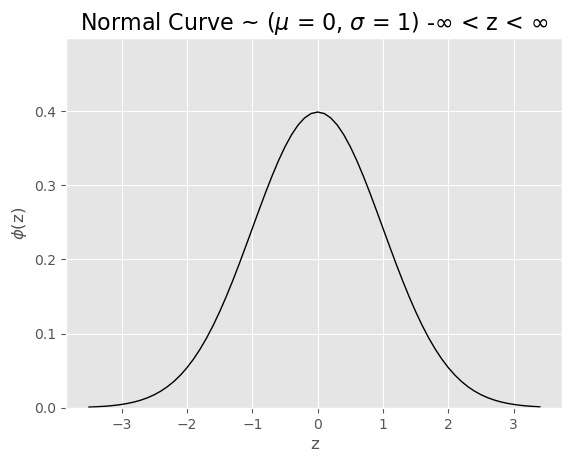

In [12]:
# The standard normal curve (standardized data)
# Plots a normal curve with specified parameters and area below curve shaded between lbound and rbound.
# datascience.util.plot_cdf_area(rbound=None, lbound=None, mean=0, sd=1)¶

plot_normal_cdf()

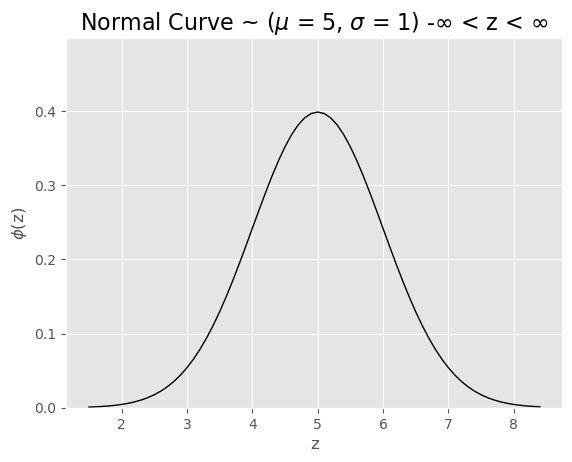

In [13]:
plot_normal_cdf(mean=5)

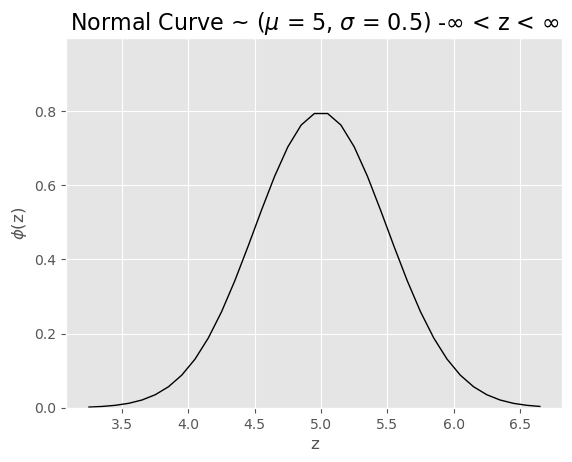

In [14]:
plot_normal_cdf(mean=5, sd=0.5)

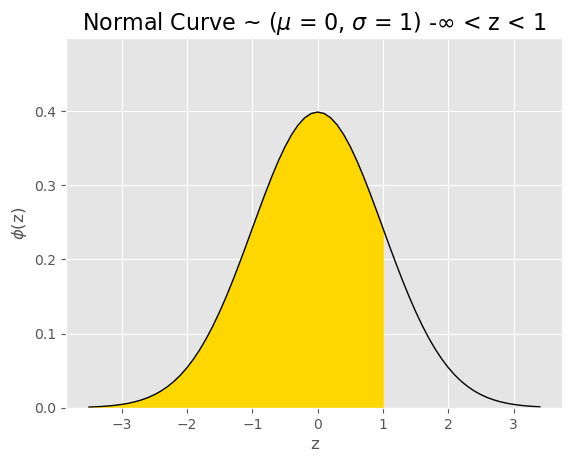

In [15]:
plot_normal_cdf(rbound=1)

In [10]:
from scipy import stats

In [11]:
stats.norm.cdf(1)

0.84134474606854293

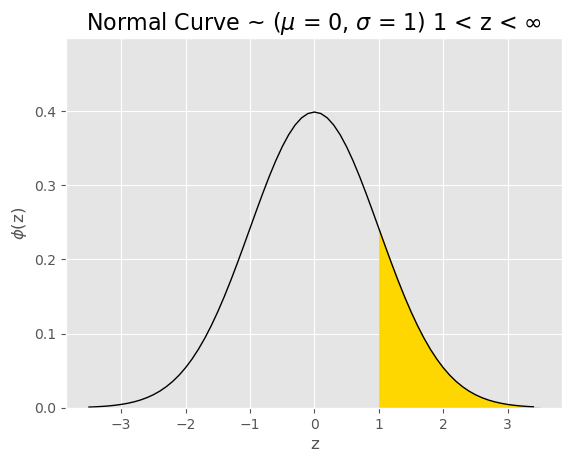

In [16]:
plot_normal_cdf(lbound=1)

In [17]:
# The total area under the curve is 1
1 - stats.norm.cdf(1)

0.15865525393145707

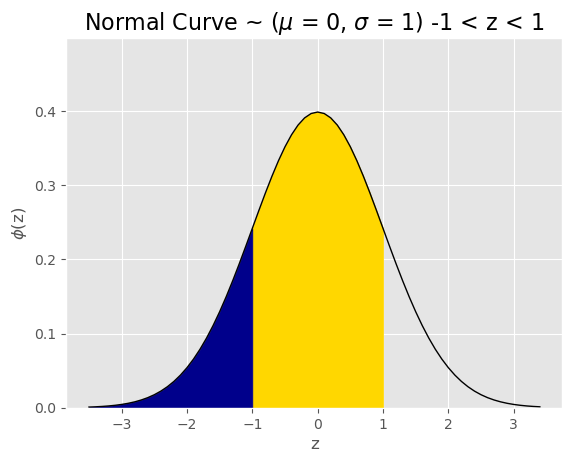

In [20]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(rbound=1, lbound=-1)

In [21]:
# Roughly 68% of the area lies within plus or minus one standard deviation
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

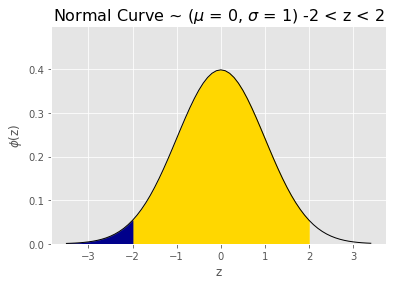

In [10]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [11]:
# Roughly 95% of the area lies within plus or minus two standard deviations
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

### Correlation

In [3]:
faithful = Table.read_table("../../Lab08/faithful-new.csv")

In [4]:
faithful.stats() 

statistic,duration,wait
min,1.6,43
max,5.1,96
median,4,76
sum,948.677,19284


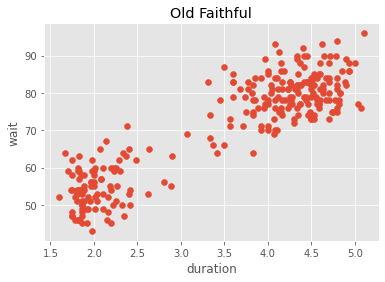

In [9]:
# Now plot
plt.style.use('ggplot')
plt.scatter(faithful.column('duration'),faithful.column('wait'))
#faithful.scatter('duration','wait') #
plt.title("Old Faithful")
plt.xlabel("duration")
plt.ylabel("wait")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

***
Standard Units
***
$\bar{x}$=mean$(x)$<br>
<br>variance=mean$((x-\bar{x})^2)$<br>
<br>SD = $\sqrt{<(x-\bar{x})^2>}$<br>
<br>Z = ${\frac{(x-\bar{x})}{SD}}$

In [10]:
duration_mean =  np.mean(faithful.column("duration"))
duration_std = np.std(faithful.column("duration"))
wait_mean =  np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


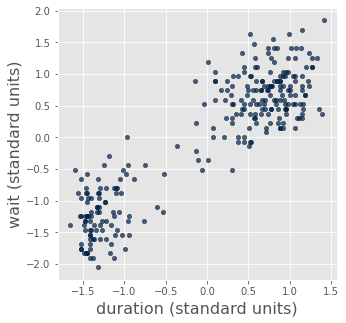

In [13]:
faithful_standard.scatter("duration (standard units)", "wait (standard units)")

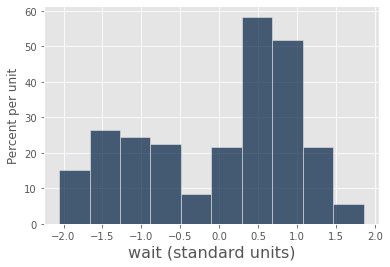

In [14]:
faithful_standard.hist("wait (standard units)")

***
Regression line
***
$$y = m x + b $$
$$ slope = m $$
$$ intercept = b $$
Standard units
$$y = m x$$